In [1]:
##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that:
#  - You should not change the name of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture

C:\Users\Austin Cheang\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Load data

In [3]:
path = '../data'
language_path = "../data/languages.txt"

In [4]:
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(path)
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)

(22000, 26)
(22000,)
(2200, 26)
(2200,)


In [5]:
Xtrn_split = split_classes(Xtrn, Ytrn)
Xtrn_classes = i_class(Xtrn_split, Ytrn)
Xtst_split = split_classes(Xtst, Ytst)
Xtst_classes = i_class(Xtst_split, Ytst)
Xtrn_mean_classes = classes_mean(Xtrn_classes, Ytrn) 
f = open(language_path, "r")
txt = f.read().split('\n')
language_list = []
for i in range(len(txt)-1):
    language_list.append(txt[i][-3:-1])
languages_3_clusters = []
for i in range(len(language_list)):
    for j in range(3):
        languages_3_clusters.append("{}({}) cluster: {}".format(language_list[i],i,j+1))
Xtrn_language_0 = Xtrn_classes[0].iloc[:,:-1]
Xtst_language_0 = Xtst_classes[0].iloc[:,:-1]


In [14]:
kmeans_classifier = KMeans(n_clusters=22, random_state=1)
kmeans_pred = kmeans_classifier.fit_predict(Xtrn)
kmeans_pred = kmeans_pred.tolist()
cluster_centers = kmeans_classifier.cluster_centers_

kmeans_pred_assemble = split_classes(Xtrn, kmeans_pred)
kmeans_pred_classes = i_class(kmeans_pred_assemble, Ytrn)

## 3.1 (3 points) Apply k-means clustering on Xtrn for k = 22, where we use sklearn.cluster.KMeans with the parameters n_clusters=22 and random_state=1. Report the sum of squared distances of samples to their closest cluster centre, and the number of samples for each cluster.

In [21]:
# Q3.1
def iaml01cw2_q3_1():
    cluster_distance = []
    for i in range(len(kmeans_pred_classes)):
    #     print(len(kmeans_pred_classes[i]))
        distances = []
        for j in range(len(kmeans_pred_classes[i])):
            distance = (euclidean(kmeans_pred_classes[i].iloc[j,:-1], cluster_centers[i]))**2
    #         print('distance = {}'.format(distance))
            distances.append(distance)
    #         print('distances: ', distances)
        total = np.sum(distances)
        print("{} class has {} samples ".format(i, len(kmeans_pred_classes[i])))
        cluster_distance.append(total)
#         print('np.sum: ', np.sum(cluster_distance))
#     return cluster_distance
    print('Sum: ', np.sum(cluster_distance))
#
iaml01cw2_q3_1()   # comment this out when you run the function

0 class has 1018 samples 
1 class has 1125 samples 
2 class has 1191 samples 
3 class has 890 samples 
4 class has 1162 samples 
5 class has 1332 samples 
6 class has 839 samples 
7 class has 623 samples 
8 class has 1400 samples 
9 class has 838 samples 
10 class has 659 samples 
11 class has 1276 samples 
12 class has 121 samples 
13 class has 152 samples 
14 class has 950 samples 
15 class has 1971 samples 
16 class has 1251 samples 
17 class has 845 samples 
18 class has 896 samples 
19 class has 930 samples 
20 class has 1065 samples 
21 class has 1466 samples 
Sum:  38185.816947117375


## 3.2 (3 points) Using the training set only, calculate the mean vector for each language, and plot the mean vectors of all the 22 languages on a 2D-PCA plane, where you apply PCA on the set of 22 mean vectors without applying standardisation. On the same figure, plot the cluster centres obtained in Question 3.1.
## You should format the figure nicely so that language and cluster information is clear. Language information should be shown in terms of name, its abbreviation, or number. Are the mean vectors and cluster centres similar? Discuss your findings briefly.

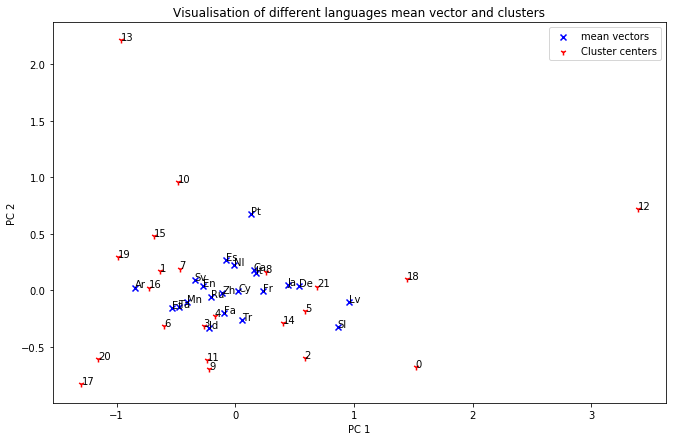

In [17]:
# Q3.2
def iaml01cw2_q3_2():
    Xtrn_mean_classes = classes_mean(Xtrn_classes, Ytrn)
    data = pd.DataFrame() ## Just for me to better visualise the mean vector
    for i in range(len(Xtrn_mean_classes)):
        data[i] = Xtrn_mean_classes[i]
    data = data.T
    pca_2 = PCA(n_components=2)
    pc_2_Xtrn_mean = pca_2.fit_transform(data)
    pc_2_centers = pca_2.fit_transform(cluster_centers)
    plt.figure(figsize=(11,7))

    plt.scatter(pc_2_Xtrn_mean[:,0], pc_2_Xtrn_mean[:,1], color = 'blue', marker='x')
    plt.scatter(pc_2_centers[:,0], pc_2_centers[:,1], color = 'red', marker='1')

    for i, lang in enumerate(language_list):
        plt.annotate(lang, (pc_2_Xtrn_mean[i][0], pc_2_Xtrn_mean[i][1]))
    for i, centers in enumerate(np.unique(Ytrn)):
        plt.annotate(centers, (pc_2_centers[i][0], pc_2_centers[i][1]))

    plt.title('Visualisation of different languages mean vector and clusters')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(['mean vectors', 'Cluster centers'])
    plt.savefig('q3_2')
    plt.show()

iaml01cw2_q3_2()   # comment this out when you run the function

## 3.3 (3 points) We now apply hierarchical clustering on the training data set to see if there are any structures in the spoken languages.
## To avoid the analysis being cluttered, we represent the data of each language by the mean vector for that language, so that we only use 22 mean vectors for this analysis instead of using all the data in the training set. Now, using scipy.cluster.hierarchy, carry out hierarchical clustering with the Ward’s linkage and display the dendrogram with an option of orientation=’right’. Provide appropriate labels to indicate the language of each leaf node.
Discuss your findings.

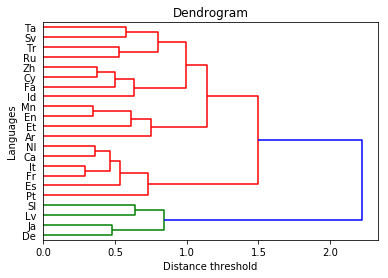

In [18]:
# Q3.3

def iaml01cw2_q3_3():
    dendrogram = sch.dendrogram(sch.linkage(Xtrn_mean_classes, method = 'ward'),orientation='right', labels=language_list)
    plt.title('Dendrogram')
    plt.xlabel('Distance threshold')
    plt.ylabel('Languages')
    plt.savefig('q3_3.png')
    plt.show()
#
iaml01cw2_q3_3()   # comment this out when you run the function

## 3.4 (5 points) We here extend the hierarchical clustering done in Question 3.3 by using multiple samples from each language.
### To that end, apply k-means clustering with the parameters n_clusters=3 and random_state=1 to the training data for each language to find 3 cluster centres, which will result in 3 × 22 = 66 vectors in total.
### Carry out hierarchical clustering with each of the linkage methods, ’ward’, ’single’, and ’complete’ on the 66 vectors. Plot a dendrogram for each method, and discuss the results briefly.

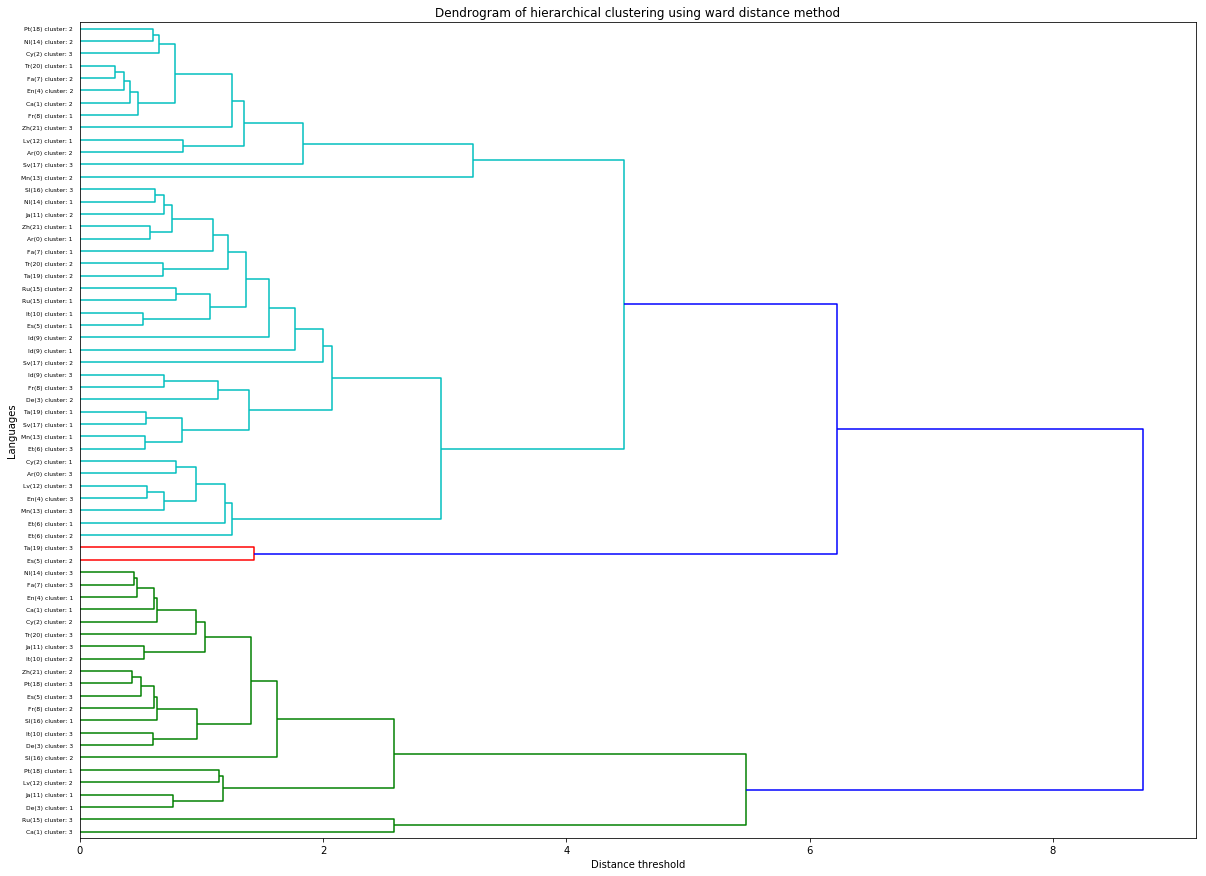

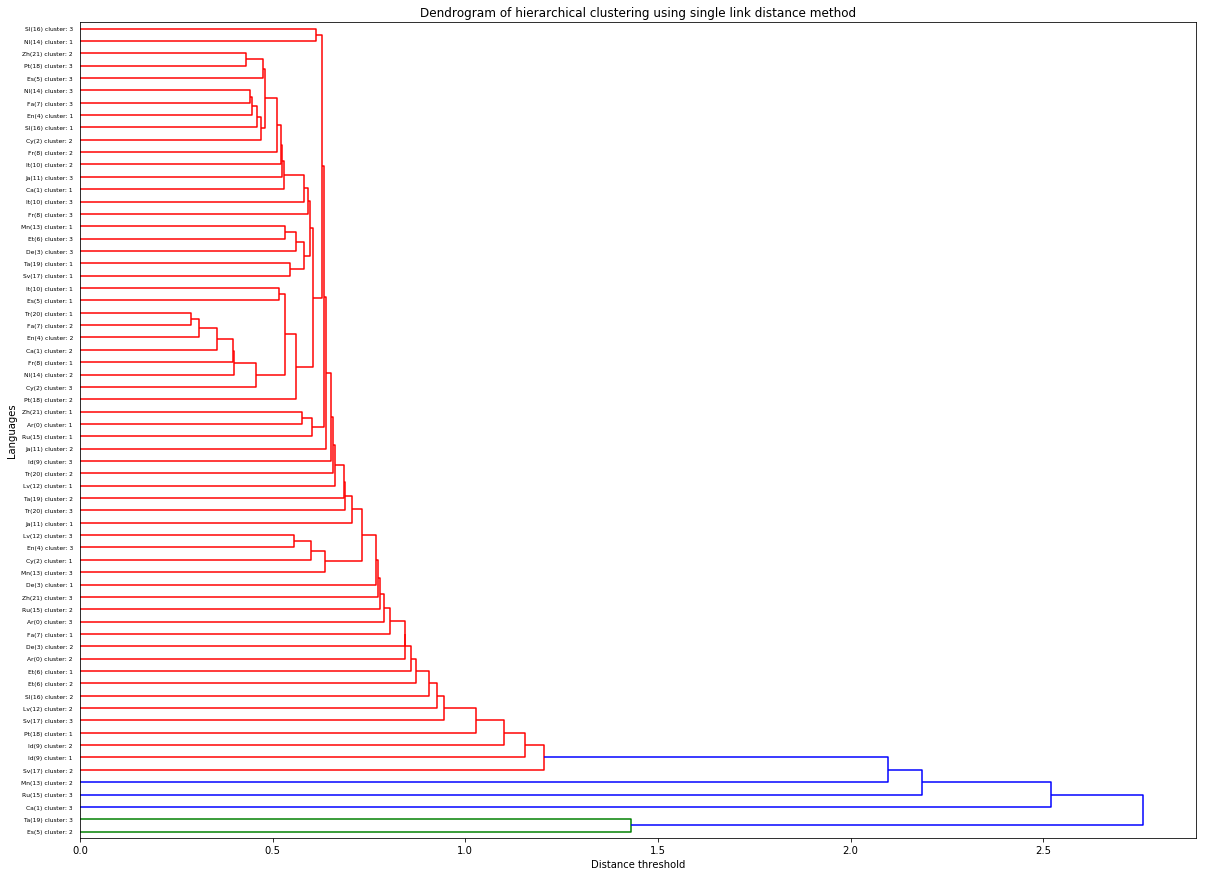

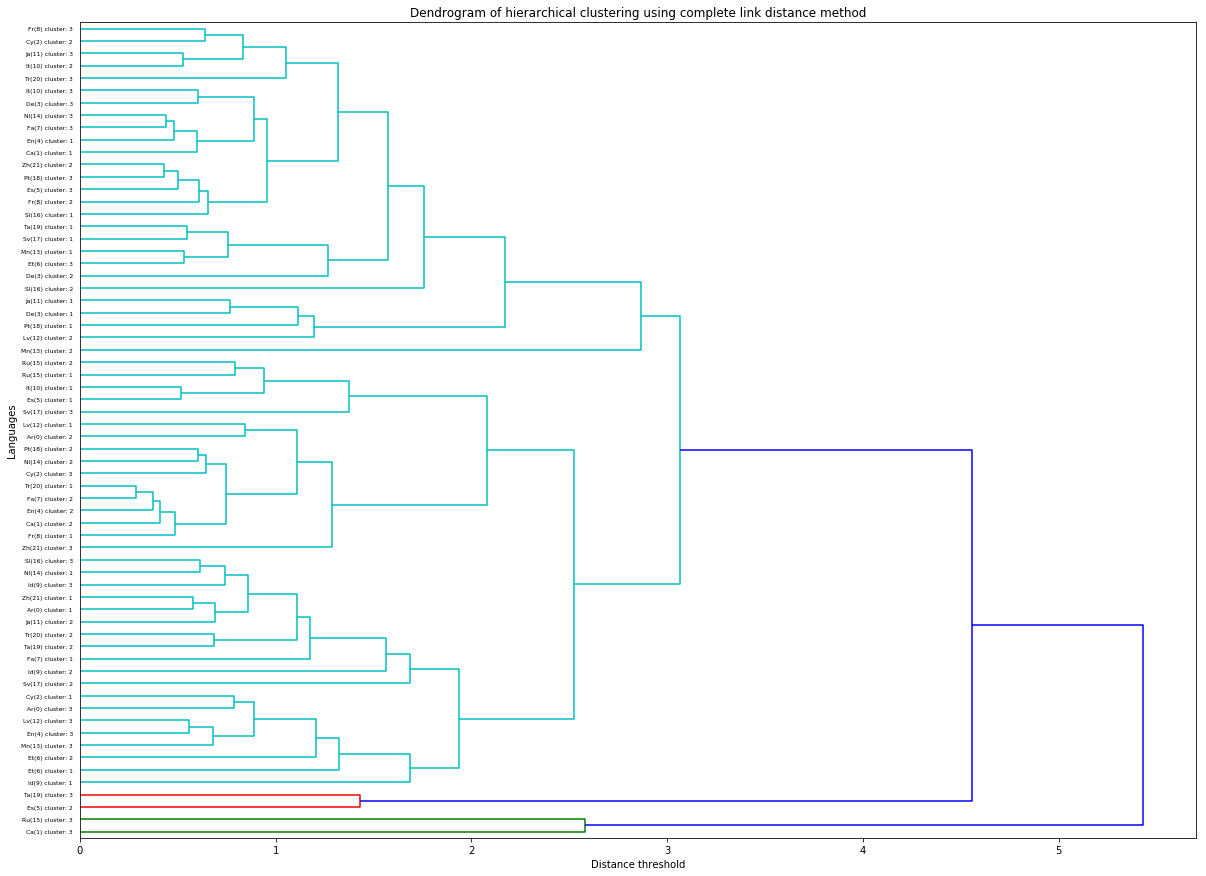

In [19]:
# Q3.4
def iaml01cw2_q3_4():
    data = []
    for i in range(np.unique(Ytrn).shape[0]):
        kmeans_3 = KMeans(n_clusters=3, random_state=1)
        kmeans_3.fit_predict(Xtrn_classes[i].iloc[:,:-1])
        for c in kmeans_3.cluster_centers_:
            data.append(c)

    methods = ['ward', 'single', 'complete']
    
    for i in range(len(methods)):
        plt.figure(figsize=(20,15))
        dendrogram = sch.dendrogram(sch.linkage(data, method = methods[i]),orientation='right',labels = languages_3_clusters)
        if i == 1 or i == 2:
            plt.title('Dendrogram of hierarchical clustering using {} link distance method'.format(methods[i]))
        else:
            plt.title('Dendrogram of hierarchical clustering using {} distance method'.format(methods[i]))
        plt.xlabel('Distance threshold')
        plt.ylabel('Languages')
        plt.savefig('q3_4_{}'.format(methods[i]))
        plt.show()

iaml01cw2_q3_4()   # comment this out when you run the function

## 3.5

K = 1 in diag matrix for training_sample has likelihood 14.280416
K = 1 in diag matrix for test_sample has likelihood 13.842924
K = 1 in full matrix for training_sample has likelihood 16.393600
K = 1 in full matrix for test_sample has likelihood 15.810512
------------------------------------
K = 3 in diag matrix for training_sample has likelihood 15.398430
K = 3 in diag matrix for test_sample has likelihood 15.040748
K = 3 in full matrix for training_sample has likelihood 18.086005
K = 3 in full matrix for test_sample has likelihood 17.066076
------------------------------------
K = 5 in diag matrix for training_sample has likelihood 16.010389
K = 5 in diag matrix for test_sample has likelihood 15.908546
K = 5 in full matrix for training_sample has likelihood 19.035724
K = 5 in full matrix for test_sample has likelihood 16.489426
------------------------------------
K = 10 in diag matrix for training_sample has likelihood 16.916505
K = 10 in diag matrix for test_sample has likelihood 1

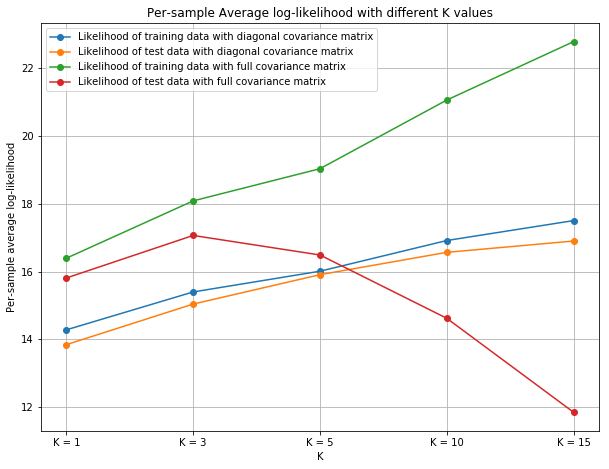

In [20]:
# Q3.5
def iaml01cw2_q3_5():
    K = [1,3,5,10,15]
    matrix = ['diag', 'full']
    k_diag_train = []
    k_diag_test = []
    k_full_train = []
    k_full_test = []

    ## diag
    for k in K:
        gm = GaussianMixture(n_components=k, covariance_type=matrix[0], random_state=1)
        gm.fit(Xtrn_language_0)
        train = gm.score(Xtrn_language_0)
        test = gm.score(Xtst_language_0)
        k_diag_train.append(train)
        k_diag_test.append(test)

    ## full
    for k in K:
        gm = GaussianMixture(n_components=k, covariance_type=matrix[1], random_state=1)
        gm.fit(Xtrn_language_0)
        train = gm.score(Xtrn_language_0)
        test = gm.score(Xtst_language_0)
        k_full_train.append(train)
        k_full_test.append(test)

    for i in range(len(K)):
        print("K = {} in diag matrix for training_sample has likelihood {:3f}".format(K[i],k_diag_train[i]))
        print("K = {} in diag matrix for test_sample has likelihood {:3f}".format(K[i],k_diag_test[i]))
        print("K = {} in full matrix for training_sample has likelihood {:3f}".format(K[i],k_full_train[i]))
        print("K = {} in full matrix for test_sample has likelihood {:3f}".format(K[i],k_full_test[i]))
        print('------------------------------------')
        
    x = [0,1,2,3,4]
    legends = ['Likelihood of training data with diagonal covariance matrix', 'Likelihood of test data with diagonal covariance matrix',
          'Likelihood of training data with full covariance matrix','Likelihood of test data with full covariance matrix']

    plt.figure(figsize=(10,7.5))
    plt.plot(k_diag_train, marker = 'o' )
    plt.plot(k_diag_test, marker = 'o')
    plt.plot(k_full_train, marker = 'o')
    plt.plot(k_full_test, marker = 'o')
    plt.xticks([0,1,2,3,4], ['K = 1', 'K = 3', 'K = 5', 'K = 10', 'K = 15'] )
    plt.grid(True)
    plt.legend(legends)
    plt.title('Per-sample Average log-likelihood with different K values')
    plt.xlabel('K')
    plt.ylabel('Per-sample average log-likelihood')
    plt.savefig('q3_5')

iaml01cw2_q3_5()   # comment this out when you run the function